## As I have promised you guys at the end of the workshop, here it is the notebook that I have prepared for all of you.Since all of you are now considered Ninjas in Azure Machine Learning Studio, let's understand more about the dataset using Python.

In this challenge, we are going to look at analyzing people's survival using Machine Learning technique.
During the workshop, I have described the whole case study using Azure Machine Learning Studio.Hope you guys still remember how it
was done.

If you guys are not somewhat clear of what we did the other day, check these links:
1. The whole process of solving the Titanic Problem -- https://www.youtube.com/watch?v=kXJ20DWiamM&t=1078s
2. To understand the whole workflow in detail -- https://blog.datasciencedojo.com/azhttp://demos.datasciencedojo.com/demo/titanic/ure-ml-tutorial/

3. To try out the Azure Machine Learning Titanic Predictor -- http://demos.datasciencedojo.com/demo/titanic/
4. To demo your project on Excel -- https://www.youtube.com/watch?v=thyrg2AWyq0
    

In this notebook, I will be guiding everyone on making a Machine Learning model on the exact Titanic dataset but using Python.
This is to ensure that everyone understands the why behind every steps.

To start your notebook on Jupyter, just start Anaconda Navigator and click on Jupyter Notebook and you are set to go!!!

![title](safe_image.gif)

### Let’s first understand the goal and data set available for prediction. I suggest everyone to read the data definition mentioned in below snapshots or directly from Kaggle page.

![title](1.png)

In short, We have two data sets, one for training and one for test. Survival attribute in the data set is the target attribute. 
Survival attributed is available in training data set but not available in test because we need to predict the same. 
Finally we need to come up with a result set where given a PassengerId from test set we should have Survival prediction.

This is a bit different than the original steps because that was meant for a 3 hours worskhop.
This is the real problem and this is exactly how you tackle real Machine Learning problems.

In [1]:
# For visualization purpose
%matplotlib inline
import matplotlib.pyplot as plt
# For data cleaning and wrangling
import pandas as pd
# For data manipulation and operations
import numpy as np
# For statistical functions
import scipy.stats as stats
# For machine learning purpose
import sklearn
# For regular expression operations
import re as re
#Loading traning data.Make sure you guys have downloaded the train.csv file into the same folder as this Jupyter Notebook
train = pd.read_csv('train.csv')
# To print first 10 rows
train.head(10)

#Survived is target attribute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 Data set consists of 12 attributes mixed of categorical and numerical:

1.Categorical Attributes: PassengerId, Survived, Pclass, Sex, Ticket, Cabin & Embarked

2.Numerical Attributes: SlibSp, Parch & Fare

In [2]:
# Loading the test data to just take a look at
test = pd.read_csv('test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
# This is to check the true result.Check this data in Kaggle
gender_meta = pd.read_csv('gender_submission.csv')
gender_meta.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Now we will proceed with the next step called Feature Engineering.
![title](tenor.gif)

#### Feature engineering, the process creating new input features for machine learning, is one of the most effective ways to improve predictive models.

I would recommend you guys to read this blog for better understanding -- https://elitedatascience.com/feature-engineering-best-practices

Lets check all the attributes in the context of missing values.

In [4]:
#Check all attributes in the context of missing values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In the train set, Age,Cabin and Embarked columns have missing values.Now lets check the test set.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Just like the train set, the test set has the same proportion of missing values for Age,Cabin and Embarked.Creating a test set with the same proportion as the training set is called as Stratified Splitting which we covered in the workshop.

PassengerId is a nominal attribute, this means if we reassign all passengers ids, it will not make any difference on the data set hence we can ignore this for now.

Survived is target attribute.

Pclass is numeric attribute and it does not have any missing value, lets check it’s impact on target attribute.

### Pclass 

In [6]:
#Impact of PClass on Traning Data
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Here we have taken mean, this data represents that Pclass=1 survival rate is 62.96%.

### Sex
Sex attribute is categorical attribute having values male or female and does not have missing values.

In [7]:
#Impact of Sex attribute on Traning Data
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Females are more secure, Female survival rate is more than male.

### SibSp 
SibSp is a numerical attribute represents the siblings/spouse.

In [8]:
#Impact of SibSp attribute on Traning Data
print (train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


### Parch 
Parch is also numerical attribute represents the children/parents.

In [9]:
#Impact of Parch attribute on Traning Data
train['Parch'].astype(int)
print (train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


### When deling with real problems, the most important part of feature engineering would be creating a new atrribute based on the given attributes.This is when we as human beings will use our rational way of thinking to assume a correlation and find more insights instead of feeding everything to the machine.

### Family Size
Based on the impact of SibSp & Parch, lets create a new attribute called Family size.

In [10]:
full_data = [test,train]
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Just by creating a new attribute it shows a good effect on our prediction, lets check if what is the effect of being alone on this ship.

### IsAlone

In [11]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Hmmm, so now you guys know its not good to be alone most of the time 🤣

### Embarked 
Embarked attribute is having missing values, best way to fill this would be by most occurred value. In this data set most occurred value for Embarked attribute is ‘S’.

As you guys can see here, normally categorical attrbutes which have missing values will be replace by Mode or Mean while numerical attributes will be replace by median.
Check here -- https://discuss.analyticsvidhya.com/t/what-are-the-ways-to-handle-missing-values-in-a-model/138

In [12]:
#Fill missing Embarked value with mode
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


### Fare 
Fare is a numeric attribute and it has missing values too. In case of Fare, filling missing values with median will be better choice than mean. It is a numeric attribute hence we need to convert this to categorical attribute to make it ready for ML algorithms we are going to use. Here we have categorized fare into 4 categories.

In [13]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


### Age 
Age is also a numeric attribute and having missing values. Filling the missing values in age attribute is tricky one. We are generating random numbers between (mean — std) and (mean + std) and filling the same. We categorized age into 5 range.

In [14]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, 
                                             size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.555556
1   (16.0, 32.0]  0.344902
2   (32.0, 48.0]  0.380165
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\kartz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Name
First thought which come to my mind is to ignore the name attribute but if you look closely names has titles which can have impact on target attribute. Lets cross check the same.

In [15]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [16]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


### Till now we have explored all the attributes, introduced few new attributes and filled the missing values. Now it is time to prepare the data by cleaning it and make it ready for ML algorithms.

### Data Cleaning
In our current data set we have few attributes/features which are not numeric. This is the time to convert those to numerical values.

1.Sex attribute is having values (female/male), we have mapped this to 0/1 respectively.

2.Title a newly generated attribute is mapped to 1/2/3/4/5 values and missing value is filled with 0.

3.Embarked attribute is mapped to 0/1/2 based on station onboarding.

4.Four categories of fare mapped to four categorical values (0/1/2/3)

5.Five age categories mapped to five categorical values (0/1/2/3/4)

6.Dropped attributes which are not required for prediction, like PassengerId, Name, Ticket, Cabin, SibSp, Parch etc.

![title](1_44nbQ40A1XYe97bixBgCOw.gif)

In [17]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) 
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
        'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    1     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


Below is the outcome and now data looks clean.

### Applying Classifiers
One can apply multiple classifiers on this data, in this exercise I will be using scikit learn inbuilt libraries. Below are the list of classifiers which comes to my mind as of now.

KNeighborsClassifier(3)

SVC(probability=True)

DecisionTreeClassifier()

RandomForestClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

GaussianNB()

LinearDiscriminantAnalysis()

QuadraticDiscriminantAnalysis()

LogisticRegression()

### Google each of these ML algorithm and find the intuition behind it.The maths might be mind boggling however intuitions aren't.So make sure you guys know what you ae doing and learn more from it.

Lets start with KNeighborsClassifier and check its Accuracy for reference, We will be using Stratified ShuffleSplit cross-validator for splitting training and test data.

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	classifier = KNeighborsClassifier(3)
	classifier.fit(X_train, y_train)
	train_predictions = classifier.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
print ("Accuracy of KNN(3) :%s" % acc)

Accuracy of KNN(3) :0.8444444444444444


Having scikit is making all the job simple, you can apply most of the classifier by writing 3–4 lines of code. Similarly we can apply list of classifiers and compare the accuracy of different models, please check the my notebook here for the complete code of list of classifiers on the titanic data set. It came out that SVM is best classifier for this data among the ones mentioned in below chart.

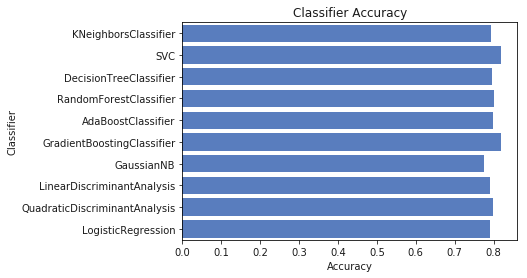

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

This is one of the wisest way to save time if you guys planning to test your data with several models and test its accuracy.However this won't give you full flexibility in terms of tuning the hyperparameters in each ML algorithm.But it isn't neccessary for our workshop.

Now we have the model ready, it is time for Magic. We can use the SVM classifier(SVC) and predict the survival of test data set by just writing below code.

### Prediction

In [20]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)
print (result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [21]:
df_test = pd.DataFrame({'survived': pd.Series(candidate_classifier.predict(test))})
df_test

,survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [22]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


You guys can cross check with the test data and df_test to see the predicted outcome and check the results with gendersubmission file to know the accuracy.

### So yeaaaa...That's a good practice for us as we have dived deep into it as beginners and we shall look forward for more workshops in the future.
If you guys have any questions, do reach out to me at kartzeswar@gmail.com.

Happy Analyzing!!!!

![title](obama.gif)